## Question 2 (a) & (b)(i)(ii)

### Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings("ignore")

### Setting the model parameter like shape of input image and number of labels in CIFAR Dataset

In [2]:
num_classes = 10
input_shape = (32, 32, 3)

### Loading the data and splitting data in train and test split. Also normalising the data

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=5000
x_train = x_train[1:n]; y_train=y_train[1:n]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

orig x_train shape: (4999, 32, 32, 3)


### Setting the ConvNet parameters and Training the ConvNet model

In [4]:
use_saved_model = False
if use_saved_model:
    model = keras.models.load_model("cifar.model")
else:
    model = keras.Sequential()
    model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
    model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    model.summary()
    batch_size = 128
    epochs = 20
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    model.save("cifar.model")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 10)                2

### Plot of Model Accuracy Vs. Epochs

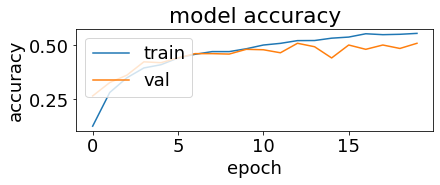

In [5]:
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

### Plot of Model Loss Vs. Epochs

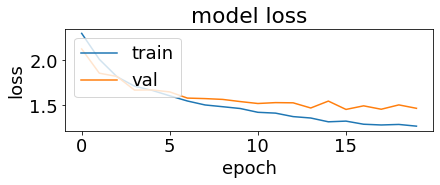

In [6]:
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss'); plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Testing model accuracy on Train Data

In [7]:
preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.50      0.59       505
           1       0.74      0.72      0.73       460
           2       0.52      0.53      0.53       519
           3       0.48      0.53      0.51       486
           4       0.52      0.53      0.52       519
           5       0.55      0.57      0.56       488
           6       0.60      0.73      0.66       518
           7       0.73      0.56      0.64       486
           8       0.65      0.75      0.70       520
           9       0.69      0.68      0.69       498

    accuracy                           0.61      4999
   macro avg       0.62      0.61      0.61      4999
weighted avg       0.62      0.61      0.61      4999

[[255  23  23  12  24   7   7  10 113  31]
 [  7 330   4   5   7   3  17   4  31  52]
 [ 24   3 274  37  62  34  42  16  19   8]
 [  1   2  37 257  28  71  64   8   8  10]
 [ 12   3  78  37 273  36  43  24   6   7]
 [  7   3  30  74  32 279 

### Testing model accracy on Test data

In [8]:
preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.45      0.51      1000
           1       0.65      0.66      0.65      1000
           2       0.41      0.43      0.42      1000
           3       0.36      0.37      0.36      1000
           4       0.41      0.41      0.41      1000
           5       0.41      0.42      0.41      1000
           6       0.52      0.63      0.57      1000
           7       0.62      0.50      0.55      1000
           8       0.56      0.67      0.61      1000
           9       0.59      0.54      0.56      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000

[[446  34  50  25  32  26  25  24 269  69]
 [ 29 660  21  15  15  16  19   9  64 152]
 [ 61  14 426  88 138  96  79  44  43  11]
 [ 23  13  93 372  84 192 139  44  19  21]
 [ 31   8 178  74 409  77 130  68  18   7]
 [ 10   7 100 199 102 417 

### Dummy Classifier

In [9]:
Most_Frequent_Dummy_Model = DummyClassifier(strategy = "most_frequent")
Most_Frequent_Dummy_Model.fit(x_train, y_train)


DummyClassifier(strategy='most_frequent')

In [10]:
Most_Frequent_Dummy_Predictions_Train = Most_Frequent_Dummy_Model.predict(x_train)

y_Most_Frequent_Dummy_Predictions_Train = np.argmax(Most_Frequent_Dummy_Predictions_Train, axis=1)
y_Train_1 = np.argmax(y_train, axis=1)
print(classification_report(y_Train_1, y_Most_Frequent_Dummy_Predictions_Train))
print(confusion_matrix(y_Train_1, y_Most_Frequent_Dummy_Predictions_Train))


              precision    recall  f1-score   support

           0       0.10      1.00      0.18       505
           1       0.00      0.00      0.00       460
           2       0.00      0.00      0.00       519
           3       0.00      0.00      0.00       486
           4       0.00      0.00      0.00       519
           5       0.00      0.00      0.00       488
           6       0.00      0.00      0.00       518
           7       0.00      0.00      0.00       486
           8       0.00      0.00      0.00       520
           9       0.00      0.00      0.00       498

    accuracy                           0.10      4999
   macro avg       0.01      0.10      0.02      4999
weighted avg       0.01      0.10      0.02      4999

[[505   0   0   0   0   0   0   0   0   0]
 [460   0   0   0   0   0   0   0   0   0]
 [519   0   0   0   0   0   0   0   0   0]
 [486   0   0   0   0   0   0   0   0   0]
 [519   0   0   0   0   0   0   0   0   0]
 [488   0   0   0   0   0 

In [11]:
Most_Frequent_Dummy_Predictions_Test = Most_Frequent_Dummy_Model.predict(x_test)

y_Most_Frequent_Dummy_Predictions_Test = np.argmax(Most_Frequent_Dummy_Predictions_Test, axis=1)
y_Test_1 = np.argmax(y_test, axis=1)
print(classification_report(y_Test_1, y_Most_Frequent_Dummy_Predictions_Test))
print(confusion_matrix(y_Test_1, y_Most_Frequent_Dummy_Predictions_Test))


              precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

[[1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0   